In [1]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando o lightgbm
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#https://www.youtube.com/watch?v=eRtwENJae0c

In [3]:
import seaborn as sns

In [5]:
df_iris = sns.load_dataset('iris')

In [6]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


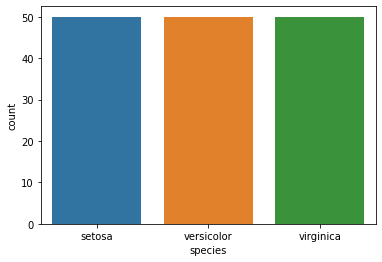

In [7]:
sns.countplot(data=df_iris,
              x='species')

In [8]:
X_iris = df_iris.drop(['species'], axis=1)
y_iris = df_iris['species']

In [9]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=42)

In [10]:
classificador = lgb.LGBMClassifier()

In [11]:
type(classificador)

lightgbm.sklearn.LGBMClassifier

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(classificador, X_iris_train, y_iris_train)

array([0.95652174, 0.95652174, 0.86363636, 0.95454545, 0.95454545])

In [15]:
# Funciona com scikit learn! <3
100 * cross_val_score(classificador, X_iris_train, y_iris_train).mean()

93.71541501976284

In [ ]:
'''
Pequena tunagem!
O LightGBM permite alteração de vários hiperparâmetros, como learning rate, altura máxima das árvores, quantidade máxima de folhas nas árvores, número de árvores (estimadores), etc...

Nosso foco não é em tunagem de hiperparâmetros, mas vamos mudar somente a altura máxima.

Vamos aproveitar também para mostrar uma característica interessante do LightGBM. Ele permite alterar a implementação do classificador! Podemos, por exemplo, utilizar random forest (bagging) ao
invés de algoritmos de boosting! Vamos ver se melhora o resultado.
'''

In [18]:
classificador_lgbm_tunado = lgb.LGBMClassifier(max_depth=2)

100 * cross_val_score(classificador_lgbm_tunado, X_iris_train, y_iris_train).mean()

93.71541501976284

In [19]:
# Classificar com random forest, com fração de 80% da base de treinamento (bagging_fraction)
# e pegando uma nova amostra de 80% a cada iteração (bagging_freq)
classificador_lgbm_rf = lgb.LGBMClassifier(boosting_type='rf', bagging_freq=1, bagging_fraction=0.8)

100 * cross_val_score(classificador_lgbm_rf, X_iris_train, y_iris_train).mean()

92.80632411067194

In [24]:
classificador_lgbm_dart = lgb.LGBMClassifier(boosting_type='dart')

100 * cross_val_score(classificador_lgbm_dart, X_iris_train, y_iris_train).mean()

93.71541501976284

In [25]:
classificador_campeao = classificador_lgbm_dart

In [26]:
# Com o melhor modelo, podemos utilizar a base toda de treino
classificador_campeao.fit(X_iris_train, y_iris_train)

LGBMClassifier(boosting_type='dart')

In [27]:
# Podemos realizar a predição da base de teste!
predicoes_iris = classificador_campeao.predict(X_iris_test)

predicoes_iris[:10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [28]:
(predicoes_iris == y_iris_test).sum()


38

In [29]:
'''
regressor
'''

'\nregressor\n'

In [30]:
# Vamos tentar prever o consumo dos carros a partir de suas features
df_mpg = sns.load_dataset('mpg')

In [31]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [32]:
# Leon é preguiçoso e tirou origin e name
X_mpg = df_mpg.drop(['mpg', 'origin', 'name'], axis=1)
y_mpg = df_mpg['mpg']

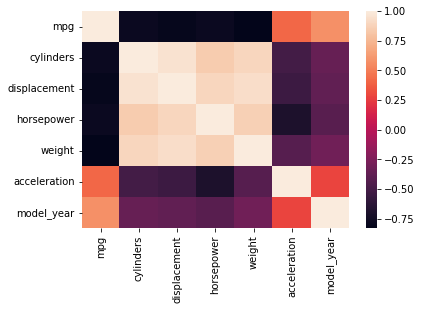

In [36]:
sns.heatmap(df_mpg.corr())

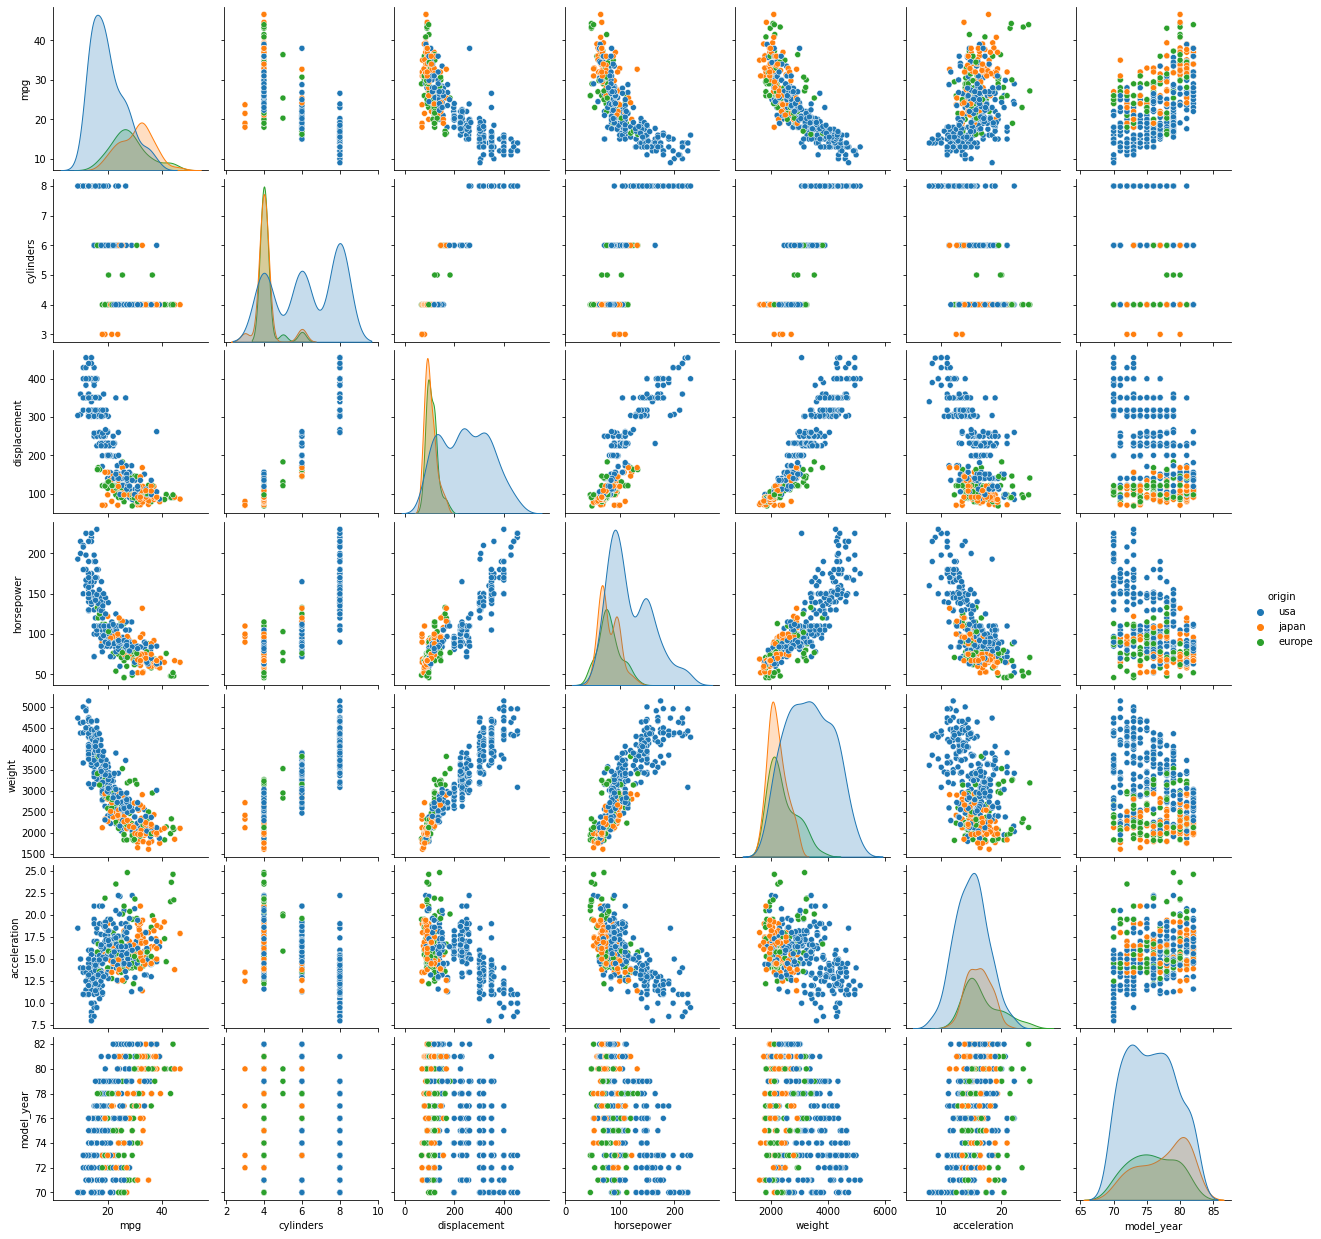

In [35]:
sns.pairplot(data=df_mpg, hue='origin')

In [37]:
from sklearn import metrics

In [40]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [41]:
X_mpg_train, X_mpg_test, y_mpg_train, y_mpg_test = train_test_split(X_mpg, y_mpg, random_state=42)


In [42]:
# Bem facinho, só mudar de LGBMClassifier para LGBMRegressor
regressor_lgbm = lgb.LGBMRegressor()

cross_val_score(regressor_lgbm, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.0602968789895

In [43]:
regressor_lgbm_tunado = lgb.LGBMRegressor(max_depth=2)

cross_val_score(regressor_lgbm_tunado, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.085218235455716

In [44]:
regressor_lgbm_dart = lgb.LGBMRegressor(boosting_type='dart')

cross_val_score(regressor_lgbm_dart, X_mpg_train, y_mpg_train, scoring='neg_root_mean_squared_error').mean()

-3.8958190536698334

In [45]:
regressor_campeao = regressor_lgbm


In [46]:
regressor_campeao.fit(X_mpg_train,y_mpg_train, eval_metric='root_mean_squared_error')

LGBMRegressor()

In [47]:
predicoes_mpg = regressor_campeao.predict(X_mpg_test)

predicoes_mpg[:10]

array([32.62089047, 30.47819635, 21.1453571 , 15.63407173, 13.12103143,
       24.96860052, 25.72020663, 12.72353355, 17.82671692, 19.06759737])